In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#build the time series, just a simple AR(1)
t1 = [0.1*np.random.normal()]
for _ in range(100):
    t1.append(0.5*t1[-1] + 0.1*np.random.normal())

In [3]:
#build the time series that is granger caused by t1
t2 = [item + 0.1*np.random.normal() for item in t1]

In [4]:
#adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

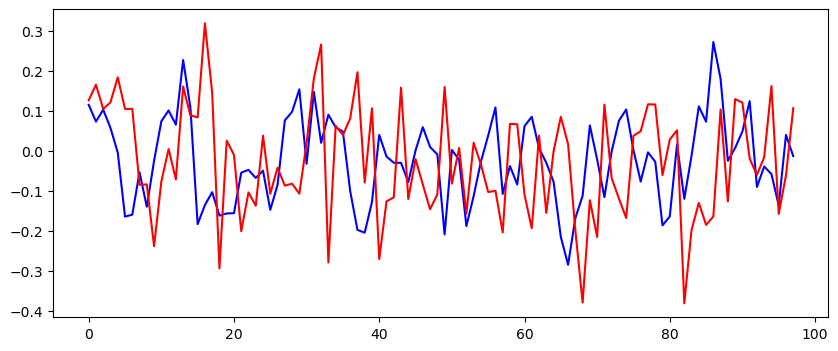

In [5]:
plt.figure(figsize=(10,4))
plt.plot(t1, color='b')
plt.plot(t2, color='r')

In [6]:
ts_df = pd.DataFrame(columns=['t2', 't1'], data=zip(t2,t1))

In [7]:
ts_df

,t2,t1
0,0.126851,0.115647
1,0.166087,0.073553
2,0.105052,0.103389
3,0.121916,0.057585
4,0.184540,-0.004033
...,...,...
93,-0.015688,-0.038883
94,0.162425,-0.057836
95,-0.157587,-0.136716
96,-0.060965,0.040223


In [8]:
gc_res = grangercausalitytests(ts_df, 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2785  , p=0.2611  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=1.3193  , p=0.2507  , df=1
likelihood ratio test: chi2=1.3104  , p=0.2523  , df=1
parameter F test:         F=1.2785  , p=0.2611  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=6.2373  , p=0.0029  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=13.1600 , p=0.0014  , df=2
likelihood ratio test: chi2=12.3328 , p=0.0021  , df=2
parameter F test:         F=6.2373  , p=0.0029  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=31.0010 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=100.4011, p=0.0000  , df=3
likelihood ratio test: chi2=68.5119 , p=0.0000  , df=3
parameter F test:         F=31.0010 , p=0.0000  , df_denom=88, df_num=3


## At lag 3 all p values are 0, so we can say time series t2 is granger cause by time series t1 by looking at  3 lags